# **TELCO CUSTOMER CHURN PREDICTION**

Customer churn refers to the phenomenon where customers stop doing business with a company or cease using a service. It's a critical metric for businesses as it directly impacts revenue and growth. Understanding and managing customer churn involves tracking the rate at which customers leave and identifying the reasons behind their departure. This helps businesses implement strategies to retain existing customers and improve customer satisfaction.


This notebook uses **IBM's** [TELCO CUSTOMER CHURN](https://www.kaggle.com/datasets/blastchar/telco-customer-churn) Dataset.
  
---



**Information About the Dataset:**

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

*Data Overview:*


*   Customers who left within the last month the column is called Churn

*   Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

*   Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges.

*   Demographic info about customers – gender, age range, and if they have partners and dependents



---

**COLUMN DETAILS**
* customerID: Customer ID

* gender: Whether the customer is a male or a female

* SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)

* Partner: Whether the customer has a partner or not (Yes, No)

* Dependents: Whether the customer has dependents or not (Yes, No)

* tenure: Number of months the customer has stayed with the company

* PhoneService: Whether the customer has a phone service or not (Yes, No)

* MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)

* InternetService: Customer’s internet service provider (DSL, Fiber optic, No)

* OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)

* DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)

* TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)

* StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)

* StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)

* Contract: The contract term of the customer (Month-to-month, One year, Two year)

* PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)

* PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

* MonthlyCharges: The amount charged to the customer monthly

* TotalCharges: The total amount charged to the customer

* Churn: Whether the customer churned or not (Yes, No)
















# **Importing**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import StratifiedKFold, cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
# from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

# **Loading the dataset**

In [ ]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# **Data Exploration**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Customer ID dropped, doesn't help in analysis.

In [ ]:
df.drop('customerID',axis=1,inplace=True)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Convert 'Total_Charges' from object type to numeric.

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
df.shape

(7043, 20)

In [ ]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
df[df['TotalCharges'].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [ ]:
df['TotalCharges'].isnull().sum()

11

In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df.duplicated(subset=df.columns).sum()

22

In [ ]:
df.duplicated().eq(df.all()).sum()

0

In [ ]:
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [ ]:
df.apply(pd.unique)

gender                                                 [Female, Male]
SeniorCitizen                                                  [0, 1]
Partner                                                     [Yes, No]
Dependents                                                  [No, Yes]
tenure              [1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...
PhoneService                                                [No, Yes]
MultipleLines                             [No phone service, No, Yes]
InternetService                                [DSL, Fiber optic, No]
OnlineSecurity                         [No, Yes, No internet service]
OnlineBackup                           [Yes, No, No internet service]
DeviceProtection                       [No, Yes, No internet service]
TechSupport                            [No, Yes, No internet service]
StreamingTV                            [No, Yes, No internet service]
StreamingMovies                        [No, Yes, No internet service]
Contract            

In [ ]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

**Test for Internet Services Discrepancies**

In [ ]:
condition = (
    (df['InternetService'] == 'No') &
    (
        (df['OnlineSecurity'] != 'No internet service') |
        (df['OnlineBackup'] != 'No internet service') |
        (df['DeviceProtection'] != 'No internet service') |
        (df['TechSupport'] != 'No internet service') |
        (df['StreamingTV'] != 'No internet service') |
        (df['StreamingMovies'] != 'No internet service')
    )
)


print(f'Numeber of dicrepancies are {condition.sum()}')




Numeber of dicrepancies are 0


**Test for Telephone Services Discrepancies**

In [ ]:
condition = ((df['PhoneService'] == 'No') & (df['MultipleLines'] != 'No phone service'))

print(f'Numeber of dicrepancies are {condition.sum()}')



Numeber of dicrepancies are 0


In [ ]:
df['TotalCharges'].le(0).sum()

0

In [ ]:
df['MonthlyCharges'].le(0).sum()

0

In [ ]:
df[(df['tenure'] == 0) & ((df['MonthlyCharges'] > 0) | (df['TotalCharges'] > 0))]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


At this point we can deduce that the average customer tenure is 32 months.

In [ ]:
df.describe(include='object')

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


Here it can be obeserved,

1. The most used Internet Service is Fiber Optic
2. Majority of people opt for month-to-month contract
3. Electronic Check is the most preferred Payment Method.

In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
df['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

In [ ]:
df.to_excel('Cleaned Teleco Dataset.xlsx', index=False)

# Dealing with Outliers

In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Maximum Customers tend to Churn In the first 2 to 8 months. Churning lowers post 15 months.

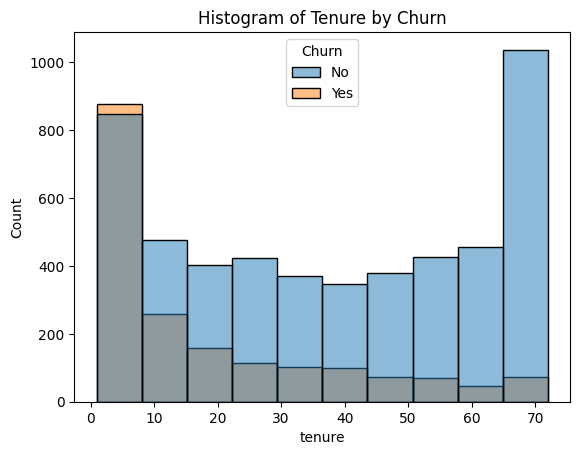

In [ ]:
# Create histograms for 'tenure' by 'churn'
sns.histplot(data=df, x='tenure', hue='Churn', bins=10)
plt.title('Histogram of Tenure by Churn')
plt.show()

Customers having Monthly Chargesin 15 - 30 credit range have lowest chances to churn.

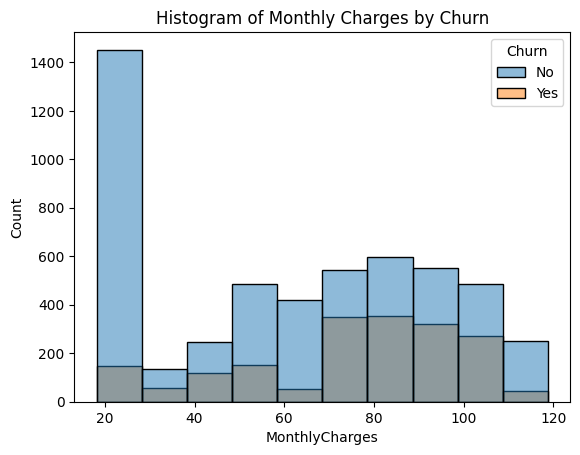

In [ ]:
# Create histograms for 'MonthlyCharges' by 'churn'
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', bins=10)
plt.title('Histogram of Monthly Charges by Churn')
plt.show()

This graph implies that people who've spent less overall given that they've not been with company for too long have churned.

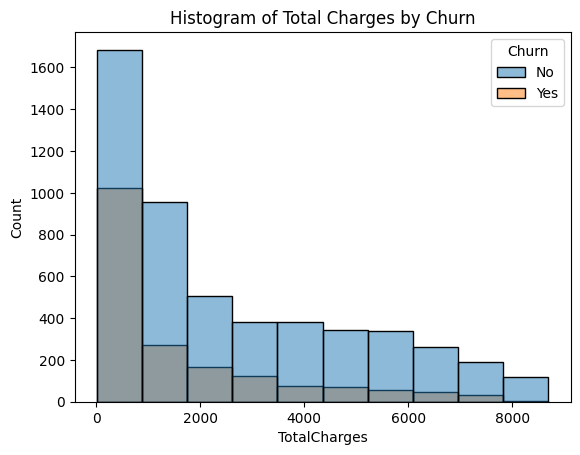

In [ ]:
# Create histograms for 'TotalCharges' by 'churn'
sns.histplot(data=df, x='TotalCharges', hue='Churn', bins=10)
plt.title('Histogram of Total Charges by Churn')
plt.show()

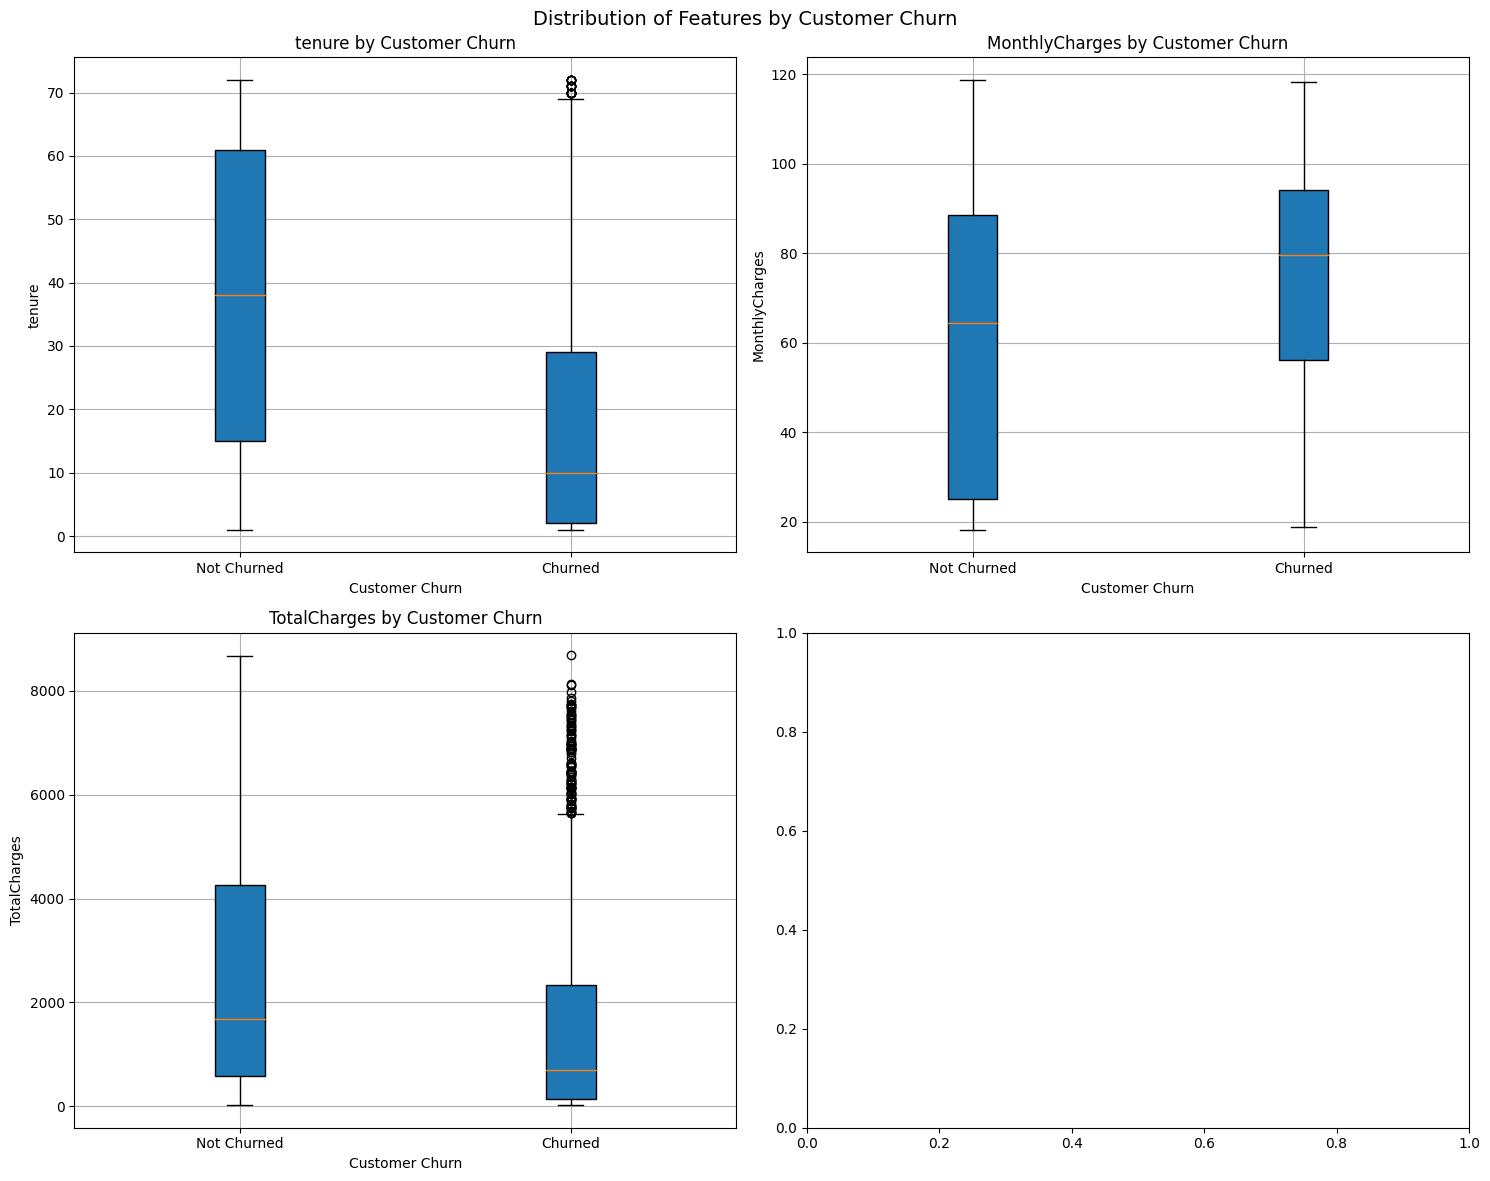

In [ ]:
features = ['tenure','MonthlyCharges', 'TotalCharges']

# Create a subplot grid to arrange multiple boxplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Loop through each feature and create a boxplot on the corresponding subplot
for i, feature in enumerate(features):
    income_data = df[feature]
    churn_data = df['Churn']
    row, col = divmod(i, 2)  # Calculate row and column positions for the subplot

    # Create a boxplot with different colors for churned and non-churned customers
    axes[row, col].boxplot([income_data[churn_data == 'No'], income_data[churn_data == 'Yes']], patch_artist=True, labels=['Not Churned', 'Churned'])
    axes[row, col].set_xlabel('Customer Churn')
    axes[row, col].set_ylabel(feature)
    axes[row, col].set_title(f'{feature} by Customer Churn')
    axes[row, col].grid(True)

# Adjust layout and titles for the subplots
fig.suptitle('Distribution of Features by Customer Churn', fontsize=14)
plt.tight_layout()
plt.show()

It is observed that, people having higher total charges have churned. Possible reasons can be waiting for a year-long contract to end due to unsatisfaction with the services/ Finding better competitor services.

We cannot classify these points as outliers or noise as they give in meaningful insights

# **Data Visualization**

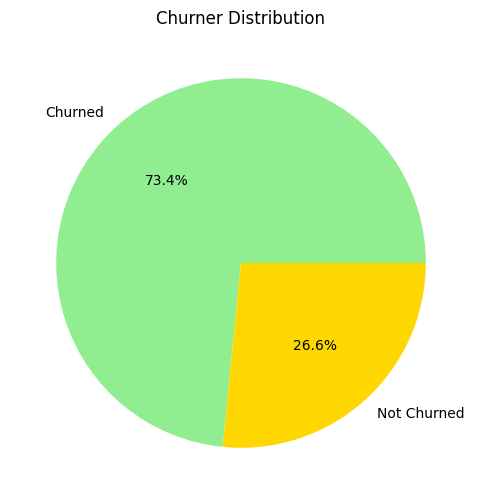

In [ ]:
labels = ['Churned', 'Not Churned']
sizes = [df['Churn'].value_counts()[0], df['Churn'].value_counts()[1]]
colors = ['lightgreen', 'gold']

plt.figure(figsize=(6, 6))
plt.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%')
plt.title('Churner Distribution')
plt.show()


Out of the total 7043 customer entries 73.4% customer base has churned while 26.6% of customer base has been retained. Data is imbalanced and needs to be balanced using SMOTE.

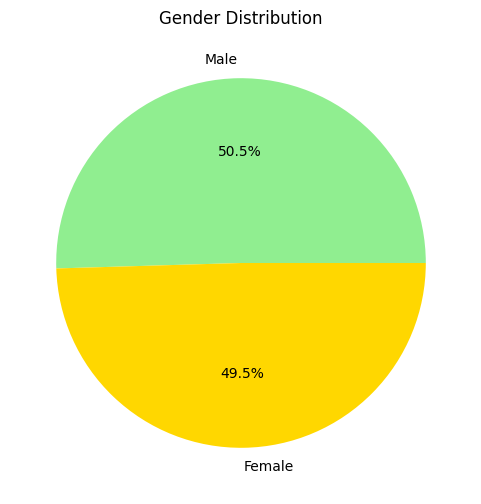

In [ ]:
labels = ['Male', 'Female']
sizes = [df['gender'].value_counts()[0], df['gender'].value_counts()[1]]
colors = ['lightgreen', 'gold']

plt.figure(figsize=(6, 6))
plt.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()


Gender Distribution is almost balanced.

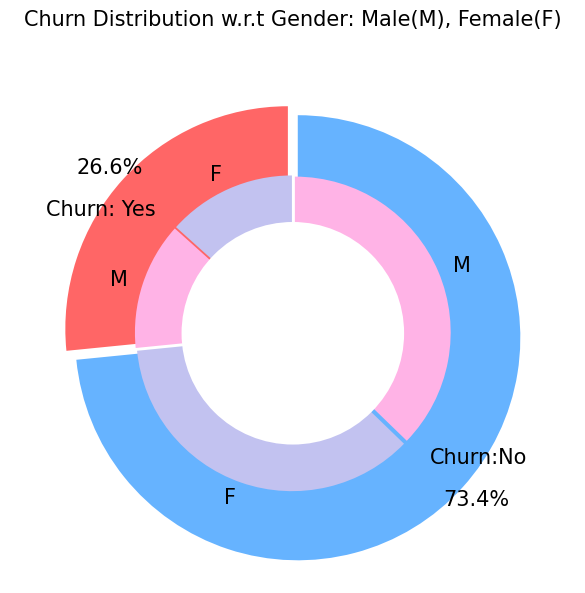

In [ ]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3)
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot

plt.axis('equal')
plt.tight_layout()
plt.show()

Men and Women Churn Equally.

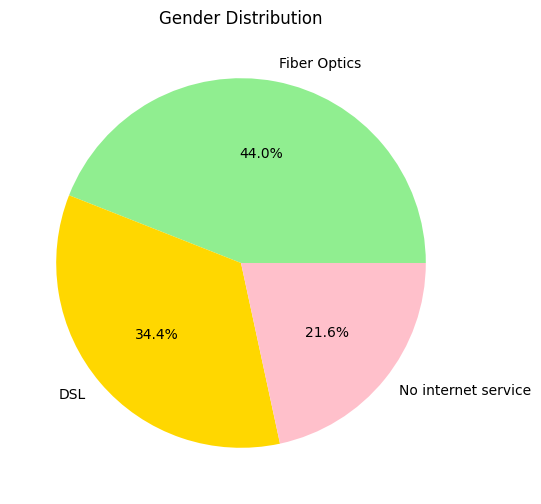

In [ ]:
labels = ['Fiber Optics', 'DSL','No internet service']
sizes = [df['InternetService'].value_counts()[0], df['InternetService'].value_counts()[1],
         df['InternetService'].value_counts()[2]]
colors = ['lightgreen', 'gold','pink']

plt.figure(figsize=(6, 6))
plt.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()


In [ ]:
df['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64

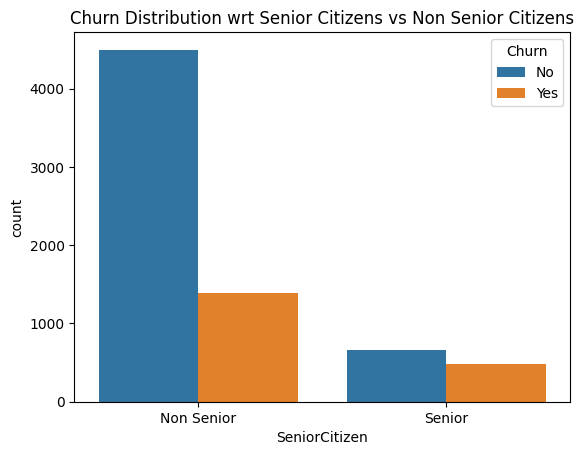

In [ ]:
sns.countplot(x='SeniorCitizen', hue='Churn', data=df)
plt.title('Churn Distribution wrt Senior Citizens vs Non Senior Citizens')
plt.xticks([0, 1], ['Non Senior', 'Senior'])
plt.show()

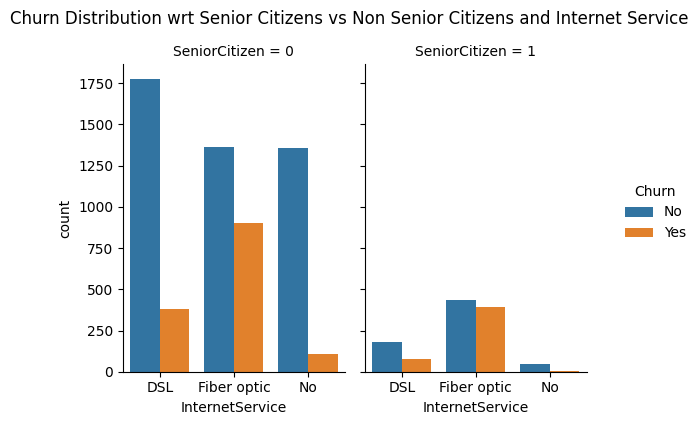

In [ ]:
# Assuming 'df' is your DataFrame
sns.catplot(x='InternetService', hue='Churn', col='SeniorCitizen',
            data=df, kind='count', height=4, aspect=.7)
plt.suptitle('Churn Distribution wrt Senior Citizens vs Non Senior Citizens and Internet Service', y=1.05)
plt.show()

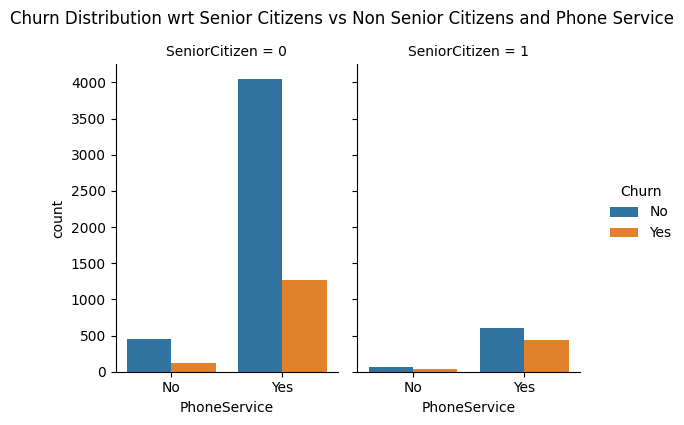

In [ ]:
# Assuming 'df' is your DataFrame
sns.catplot(x='PhoneService', hue='Churn', col='SeniorCitizen',
            data=df, kind='count', height=4, aspect=.7)
plt.suptitle('Churn Distribution wrt Senior Citizens vs Non Senior Citizens and Phone Service', y=1.05)
plt.show()

* Majority of churners who are Senior Citizens as well as Non Senior Citizens are users of Fiber Optic services. This may be because of poor fiber optic services.

* Senior citizens also churn when it comes to telephone services, might be due to some dissatisfaction with the services.

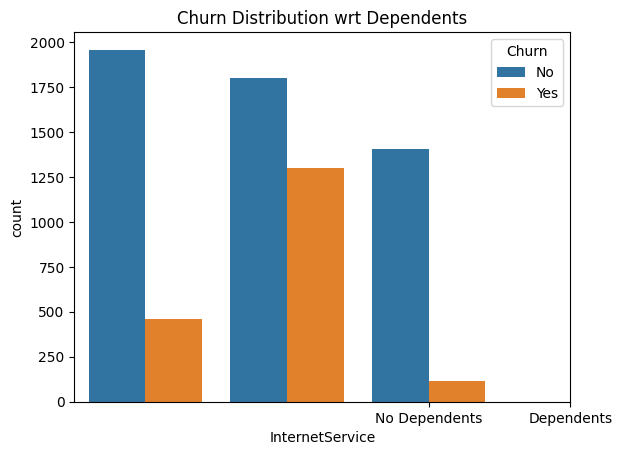

In [ ]:
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title('Churn Distribution wrt Dependents')
plt.xticks(['No', 'Yes'], ['No Dependents', 'Dependents'])
plt.show()

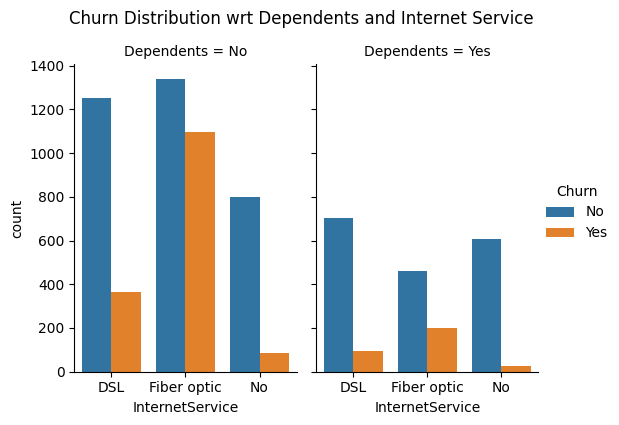

In [ ]:
sns.catplot(x='InternetService', hue='Churn', col='Dependents',
            data=df, kind='count', height=4, aspect=.7)
plt.suptitle('Churn Distribution wrt Dependents and Internet Service', y=1.05)
plt.show()

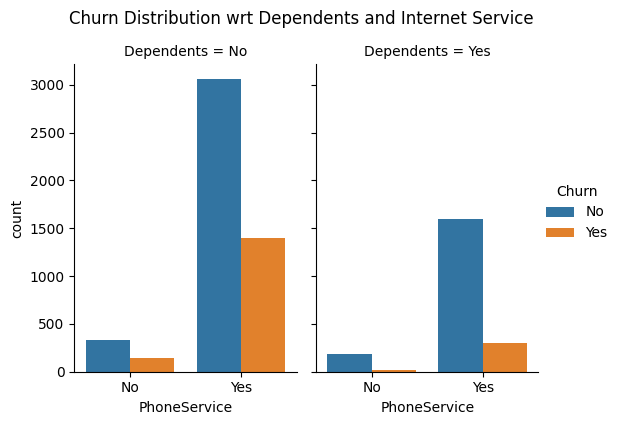

In [ ]:
sns.catplot(x='PhoneService', hue='Churn', col='Dependents',
            data=df, kind='count', height=4, aspect=.7)
plt.suptitle('Churn Distribution wrt Dependents and Internet Service', y=1.05)
plt.show()

Customers who have dependents are less likely to churn as they might have commitments which makes them avoid the hazzle of switching service provider.

Whereas people with no dependents churn more because of their financial independence and their need to get the best service in the business.

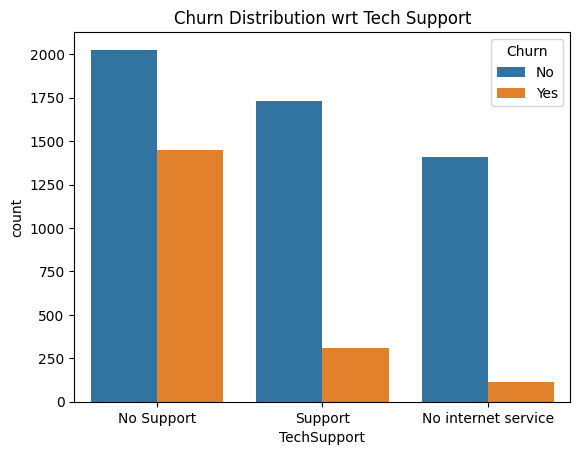

In [ ]:
sns.countplot(x='TechSupport', hue='Churn', data=df)
plt.title('Churn Distribution wrt Tech Support')
plt.xticks(['No', 'Yes','No internet service'], ['No Support', 'Support','No internet service'])
plt.show()

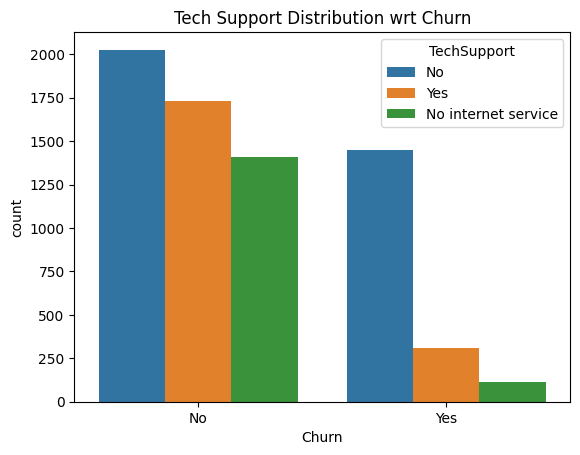

In [ ]:
sns.countplot(x='Churn', hue='TechSupport', data=df)
plt.title('Tech Support Distribution wrt Churn')
plt.xticks(['No', 'Yes'], ['No','Yes'])
plt.show()

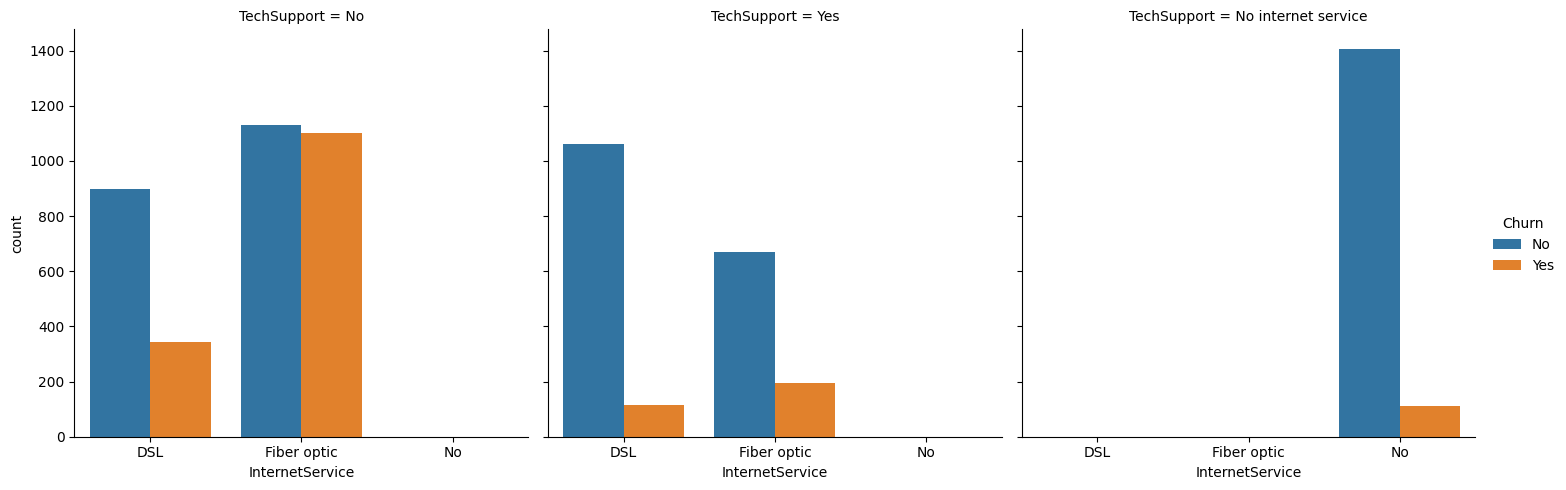

<Figure size 1000x1500 with 0 Axes>

In [ ]:
sns.catplot(x='InternetService', hue='Churn', col='TechSupport', data=df, kind='count')
plt.figure(figsize=(10, 15))
plt.show()

People who opted for fiber optics and did not seek customer support services were the ones who churned. This may indicate a problem with the fiber optic services.

In [ ]:
df['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: count, dtype: int64

In [ ]:
((df['Churn'] == 'Yes') & (df['PaymentMethod'] == 'Electronic check')).sum()


1071

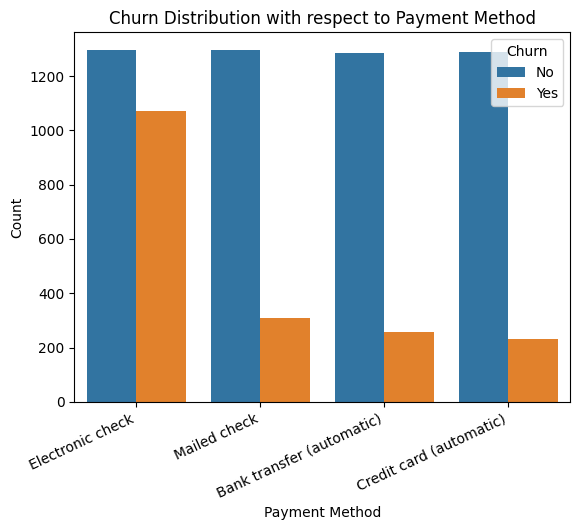

In [ ]:
# Create the countplot
sns.countplot(x='PaymentMethod', hue='Churn', data=df)

# Set plot title and labels
plt.title('Churn Distribution with respect to Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=25, ha='right')

# Display the plot
# plt.tight_layout()
plt.show()

People using Electronic Check payment method are likely to churn. This may be due to the incompetant handling of the payment from the companies end, since it's considered the most convenient way of payment.

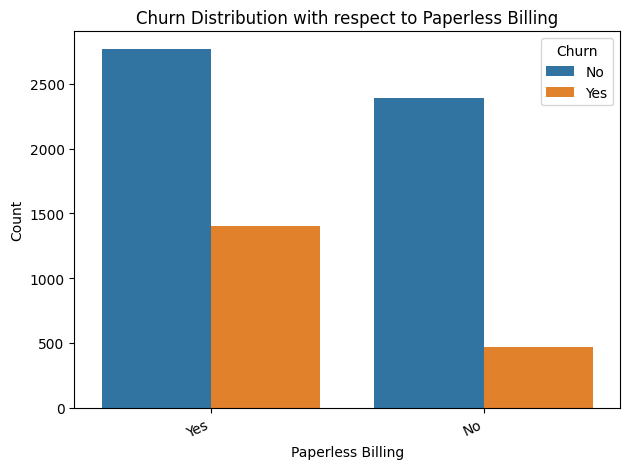

In [ ]:
# prompt: plot for paperless billing wrt churn

# Create the countplot
sns.countplot(x='PaperlessBilling', hue='Churn', data=df)

# Set plot title and labels
plt.title('Churn Distribution with respect to Paperless Billing')
plt.xlabel('Paperless Billing')
plt.ylabel('Count')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=25, ha='right')

# Display the plot
plt.tight_layout()
plt.show()


Those who've opted for paperless billing are more likely to churn.

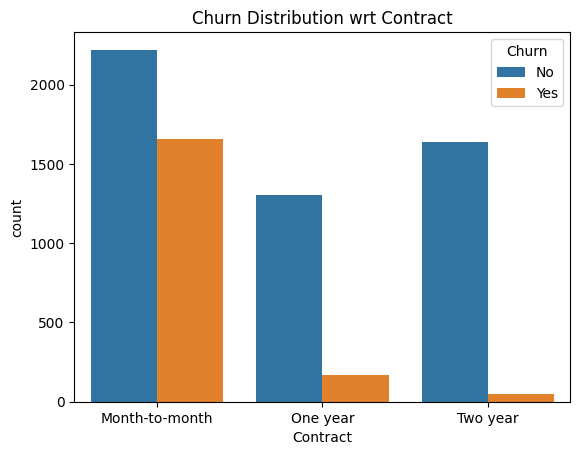

In [ ]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn Distribution wrt Contract')
plt.show()


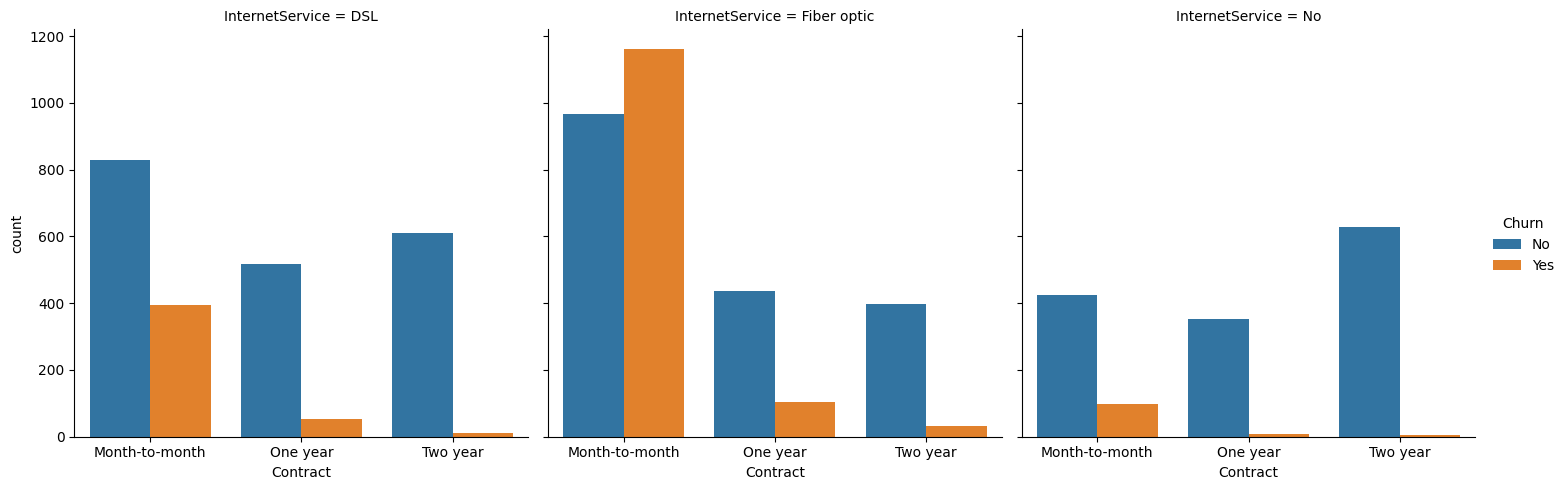

<Figure size 1000x1500 with 0 Axes>

In [ ]:
sns.catplot(x='Contract', hue='Churn', col='InternetService', data=df, kind='count')
plt.figure(figsize=(10, 15))
plt.show()


People who have a shorter contract churn the most due to poor internet services, whereas people don't churn who have a longer contract.

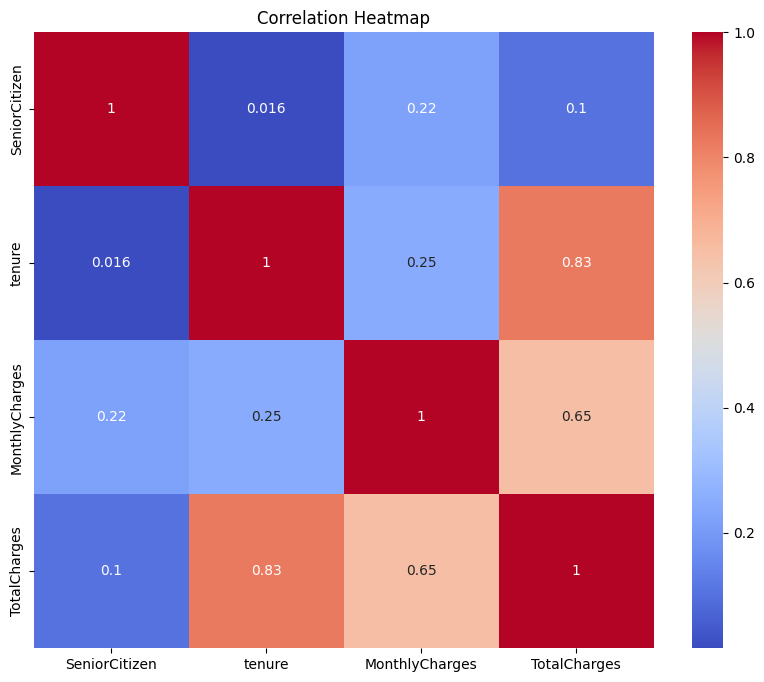

In [ ]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
print(corr)

                SeniorCitizen    tenure  MonthlyCharges  TotalCharges
SeniorCitizen        1.000000  0.015683        0.219874      0.102411
tenure               0.015683  1.000000        0.246862      0.825880
MonthlyCharges       0.219874  0.246862        1.000000      0.651065
TotalCharges         0.102411  0.825880        0.651065      1.000000


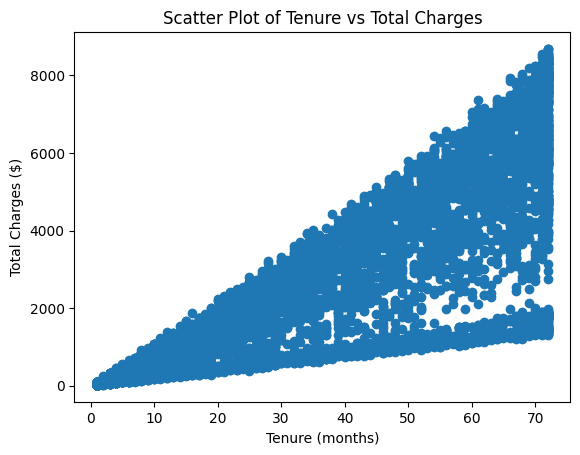

In [ ]:
plt.scatter(df['tenure'], df['TotalCharges'])
plt.xlabel('Tenure (months)')
plt.ylabel('Total Charges ($)')
plt.title('Scatter Plot of Tenure vs Total Charges')
plt.show()

* The only strong correlation is between Tenure and Total Charges. They show a linear positive correlation.

* With this we can only conclude that the people who have highly invested in the services are the ones who have been with the company for the longest.

# **Data Transformation**

In [ ]:
dfp = df.copy()
dfp

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
def map_to_target(df, cols, target_mapping):

  for col in cols:

    df[col] = df[col].map(target_mapping)
  return df

In [ ]:
target_mapping = {
    "No": 0,
    "Yes": 1,
}

cols = ['Partner','Dependents','PhoneService','PaperlessBilling','Churn']

map_to_target(dfp, cols, target_mapping)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,1,24,1,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.50,0
7039,Female,0,1,1,72,1,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.90,0
7040,Female,0,1,1,11,0,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0
7041,Male,1,1,0,4,1,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.60,1


In [ ]:
target_mapping = {
    "Female": 0,
    "Male": 1,
}

# Map the target column using the dictionary
dfp['gender'] = dfp['gender'].map(target_mapping)
dfp



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.50,0
7039,0,0,1,1,72,1,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.90,0
7040,0,0,1,1,11,0,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0
7041,1,1,1,0,4,1,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.60,1


In [ ]:
target_mapping = {
    "No internet service": 0,
    "No": 0,
    "Yes": 1,

}

cols = ['OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies']

map_to_target(dfp, cols, target_mapping)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,No,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,Yes,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,0,0,1,1,72,1,Yes,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,0,0,1,1,11,0,No phone service,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,1,1,1,0,4,1,Yes,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


In [ ]:
target_mapping = {
    "No phone service": 0,
    "No": 0,
    "Yes": 1,

}

cols = ['MultipleLines']

map_to_target(dfp, cols, target_mapping)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,0,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,0,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,1,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


In [ ]:
dfp.shape

(7032, 20)

In [ ]:
dfp = pd.get_dummies(dfp, columns=['Contract'], drop_first = True, dtype='int') # drop_first = True,
dfp = pd.get_dummies(dfp, columns=['PaymentMethod'], drop_first = True, dtype='int')  #drop_first = True,
dfp

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,DSL,0,1,...,0,1,29.85,29.85,0,0,0,0,1,0
1,1,0,0,0,34,1,0,DSL,1,0,...,0,0,56.95,1889.50,0,1,0,0,0,1
2,1,0,0,0,2,1,0,DSL,1,1,...,0,1,53.85,108.15,1,0,0,0,0,1
3,1,0,0,0,45,0,0,DSL,1,0,...,0,0,42.30,1840.75,0,1,0,0,0,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,...,0,1,70.70,151.65,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,DSL,1,0,...,1,1,84.80,1990.50,0,1,0,0,0,1
7039,0,0,1,1,72,1,1,Fiber optic,0,1,...,1,1,103.20,7362.90,0,1,0,1,0,0
7040,0,0,1,1,11,0,0,DSL,1,0,...,0,1,29.60,346.45,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,Fiber optic,0,0,...,0,1,74.40,306.60,1,0,0,0,0,1


In [ ]:
target_mapping = {
    "No": 0,
    "DSL": 1,
    "Fiber optic": 2,

}

cols = ['InternetService']

map_to_target(dfp, cols, target_mapping)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,1,0,1,...,0,1,29.85,29.85,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,1,0,...,0,0,56.95,1889.50,0,1,0,0,0,1
2,1,0,0,0,2,1,0,1,1,1,...,0,1,53.85,108.15,1,0,0,0,0,1
3,1,0,0,0,45,0,0,1,1,0,...,0,0,42.30,1840.75,0,1,0,0,0,0
4,0,0,0,0,2,1,0,2,0,0,...,0,1,70.70,151.65,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,1,0,...,1,1,84.80,1990.50,0,1,0,0,0,1
7039,0,0,1,1,72,1,1,2,0,1,...,1,1,103.20,7362.90,0,1,0,1,0,0
7040,0,0,1,1,11,0,0,1,1,0,...,0,1,29.60,346.45,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,2,0,0,...,0,1,74.40,306.60,1,0,0,0,0,1


# **Data Preparation**

In [ ]:
dfp

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,1,0,1,...,0,1,29.85,29.85,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,1,0,...,0,0,56.95,1889.50,0,1,0,0,0,1
2,1,0,0,0,2,1,0,1,1,1,...,0,1,53.85,108.15,1,0,0,0,0,1
3,1,0,0,0,45,0,0,1,1,0,...,0,0,42.30,1840.75,0,1,0,0,0,0
4,0,0,0,0,2,1,0,2,0,0,...,0,1,70.70,151.65,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,1,0,...,1,1,84.80,1990.50,0,1,0,0,0,1
7039,0,0,1,1,72,1,1,2,0,1,...,1,1,103.20,7362.90,0,1,0,1,0,0
7040,0,0,1,1,11,0,0,1,1,0,...,0,1,29.60,346.45,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,2,0,0,...,0,1,74.40,306.60,1,0,0,0,0,1


In [ ]:
tenure_min = dfp['tenure'].min()
tenure_max = dfp['tenure'].max()

monthly_charges_min = dfp['MonthlyCharges'].min()
monthly_charges_max = dfp['MonthlyCharges'].max()

total_charges_min = dfp['TotalCharges'].min()
total_charges_max = dfp['TotalCharges'].max()


print(tenure_min, tenure_max)
print(monthly_charges_min, monthly_charges_max)
print(total_charges_min, total_charges_max)

1 72
18.25 118.75
18.8 8684.8


In [ ]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the numeric columns
dfp[num_cols] = scaler.fit_transform(dfp[num_cols])

dfp

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.000000,0,0,1,0,1,...,0,1,0.115423,0.001275,0,0,0,0,1,0
1,1,0,0,0,0.464789,1,0,1,1,0,...,0,0,0.385075,0.215867,0,1,0,0,0,1
2,1,0,0,0,0.014085,1,0,1,1,1,...,0,1,0.354229,0.010310,1,0,0,0,0,1
3,1,0,0,0,0.619718,0,0,1,1,0,...,0,0,0.239303,0.210241,0,1,0,0,0,0
4,0,0,0,0,0.014085,1,0,2,0,0,...,0,1,0.521891,0.015330,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,0.323944,1,1,1,1,0,...,1,1,0.662189,0.227521,0,1,0,0,0,1
7039,0,0,1,1,1.000000,1,1,2,0,1,...,1,1,0.845274,0.847461,0,1,0,1,0,0
7040,0,0,1,1,0.140845,0,0,1,1,0,...,0,1,0.112935,0.037809,0,0,0,0,1,0
7041,1,1,1,0,0.042254,1,1,2,0,0,...,0,1,0.558706,0.033210,1,0,0,0,0,1


In [ ]:
df.shape

(7032, 20)

In [ ]:
X = dfp.drop('Churn', axis=1)  # Features
y = dfp['Churn']  # Target variable
# Split data into training and testing sets (default test_size is 0.25)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size if needed #stratify=y

In [ ]:
# Apply SMOTE only to the training data
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Confirm the class distribution after applying SMOTE
print("Class distribution after applying SMOTE:")
print(y_train.value_counts())

Class distribution after applying SMOTE:
Churn
1    4130
0    4130
Name: count, dtype: int64


In [ ]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,0,0.591549,0,0,1,0,0,...,1,1,1,0.306468,0.237411,0,0,0,0,0
1,1,0,0,0,0.028169,1,0,1,0,0,...,1,0,0,0.349751,0.019605,0,0,1,0,0
2,0,0,1,0,0.760563,1,1,2,0,0,...,0,0,1,0.592040,0.512272,0,0,0,1,0
3,1,0,1,1,0.619718,1,0,1,1,0,...,0,0,0,0.362189,0.292511,0,1,0,0,0
4,0,0,1,1,0.760563,1,1,2,1,0,...,1,1,0,0.822388,0.626564,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8255,1,0,0,0,0.000000,1,0,0,0,0,...,0,0,0,0.013527,0.000093,0,0,0,0,1
8256,0,0,0,0,0.445580,1,1,2,0,0,...,1,1,1,0.814530,0.365270,0,0,0,0,0
8257,0,0,1,1,0.482004,1,1,2,0,0,...,0,1,0,0.702156,0.347445,0,0,1,0,0
8258,1,0,0,0,0.097244,1,0,2,0,0,...,1,1,1,0.718326,0.077621,0,0,0,1,0


In [ ]:
y_train

0       1
1       1
2       1
3       0
4       0
       ..
8255    1
8256    1
8257    1
8258    1
8259    1
Name: Churn, Length: 8260, dtype: int64

# **MODEL TRAINING**

In [ ]:
model_accuracies = {}
model_f1 = {}

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
# Predict on the test set
y_pred = lr_model.predict(X_test)

# Calculate accuracy
accuracy_lr = accuracy_score(y_test, y_pred)
print("Logistic Regression accuracy is :", accuracy_lr)

# Calculate F1-score
f1_lr = f1_score(y_test, y_pred)
print("Logistic Regression F1-score is :", f1_lr)

# Store accuracy in the dictionary
model_accuracies["Logistic Regression"] = accuracy_lr * 100

# Store F1-score in the dictionary
model_f1["Logistic Regression"] = f1_lr * 100

Logistic Regression accuracy is : 0.7491115849324804
Logistic Regression F1-score is : 0.6183783783783784


In [ ]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1033
           1       0.52      0.76      0.62       374

    accuracy                           0.75      1407
   macro avg       0.71      0.75      0.72      1407
weighted avg       0.80      0.75      0.76      1407



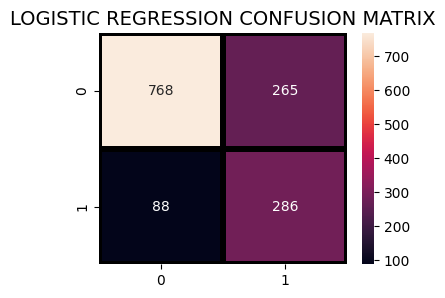

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

 **AdaBoost**

In [ ]:
a_model = AdaBoostClassifier()
a_model.fit(X_train,y_train)
a_preds = a_model.predict(X_test)
print("AdaBoost Classifier accuracy")
metrics.accuracy_score(y_test, a_preds)
model_accuracies["AdaBoost"] = metrics.accuracy_score(y_test, a_preds)*100
metrics.accuracy_score(y_test, a_preds)
f1_ad = f1_score(y_test, a_preds)
model_f1["AdaBoost"] = f1_ad * 100

AdaBoost Classifier accuracy


In [ ]:
print(classification_report(y_test, a_preds))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1033
           1       0.50      0.79      0.61       374

    accuracy                           0.74      1407
   macro avg       0.70      0.75      0.71      1407
weighted avg       0.80      0.74      0.75      1407



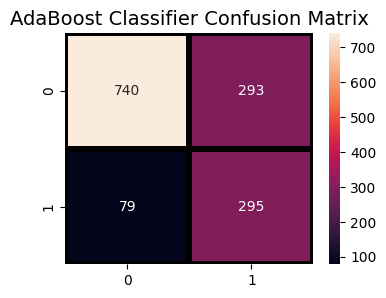

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, a_preds),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("AdaBoost Classifier Confusion Matrix",fontsize=14)
plt.show()

**Gradient Boosting**

In [ ]:
gb = GradientBoostingClassifier(learning_rate=0.2) #0.2
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print("Gradient Boosting Classifier", accuracy_score(y_test, gb_pred))
model_accuracies["Gradient Boosting"] = accuracy_score(y_test, gb_pred)*100
f1_gbc = f1_score(y_test, gb_pred)
model_f1["Gradient Boosting"] = f1_gbc * 100

Gradient Boosting Classifier 0.7427149964463398


In [ ]:
print(classification_report(y_test, gb_pred))

              precision    recall  f1-score   support

           0       0.88      0.75      0.81      1033
           1       0.51      0.72      0.60       374

    accuracy                           0.74      1407
   macro avg       0.70      0.74      0.70      1407
weighted avg       0.78      0.74      0.75      1407



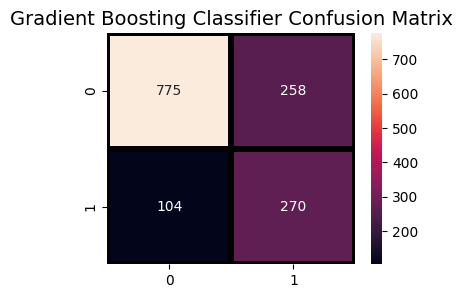

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, gb_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("Gradient Boosting Classifier Confusion Matrix",fontsize=14)
plt.show()

**Voting Classifier**

In [ ]:
from sklearn.ensemble import VotingClassifier
clf1 =  LogisticRegression()
clf2 = AdaBoostClassifier() #AdaBoostClassifier() if scaled else KNeighborsClassifier(n_neighbors=13)
clf3 = GradientBoostingClassifier(learning_rate=0.2)
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('adb', clf2), ('gbc', clf3)], voting='hard')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print("Final Accuracy Score ")
print(accuracy_score(y_test, predictions))
model_accuracies["Voting Classifier"] = accuracy_score(y_test, predictions)*100
f1_vc = f1_score(y_test, predictions)
model_f1["Voting Classifier"] = f1_vc * 100

Final Accuracy Score 
0.746268656716418


In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1033
           1       0.52      0.77      0.62       374

    accuracy                           0.75      1407
   macro avg       0.71      0.75      0.71      1407
weighted avg       0.80      0.75      0.76      1407



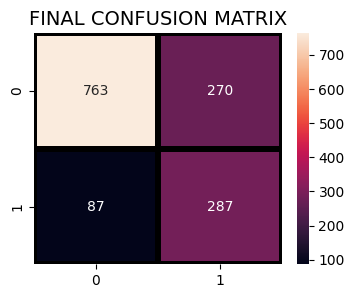

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predictions),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("FINAL CONFUSION MATRIX",fontsize=14)
plt.show()

In [ ]:
model_df = pd.DataFrame.from_dict(model_accuracies, orient='index', columns=['Accuracy'])
model_df

,Accuracy
Logistic Regression,74.911158
AdaBoost,73.560768
Gradient Boosting,74.271500
Voting Classifier,74.626866


In [ ]:
f1_model = pd.DataFrame.from_dict(model_f1, orient='index', columns=['F1-Score'])
f1_model

,F1-Score
Logistic Regression,61.837838
AdaBoost,61.330561
Gradient Boosting,59.866962
Voting Classifier,61.654135


In [ ]:
stats = pd.merge(model_df, f1_model, left_index=True, right_index=True)
stats

,Accuracy,F1-Score
Logistic Regression,74.911158,61.837838
AdaBoost,73.560768,61.330561
Gradient Boosting,74.271500,59.866962
Voting Classifier,74.626866,61.654135


In [ ]:
import joblib

joblib.dump(eclf1, 'Final_Model.joblib')

['Final_Model.joblib']

# **Test Model**

In [ ]:
import joblib

# Load the model from the file
loaded_model = joblib.load('/content/Final_Model.joblib')

In [ ]:
# def map_to_target(df, cols, target_mapping):

#   for col in cols:

#     df[col] = df[col].map(target_mapping)
#   return df

In [ ]:
# def PrepareData(inputDict):

#   data = pd.DataFrame(inputDict,index=[0])
#   if 'customerID' in data.columns:
#     data.drop(columns=['customerID'], inplace=True)

#   target_mapping = {
#     "No internet service": 0,
#     "No phone service": 0,
#     "No": 0,
#     "Yes": 1,
#     "Female": 0,
#     "Male": 1,
#     "DSL": 1,
#     "Fiber optic": 2
#   }

#   cols  = ['gender','Partner','Dependents','PhoneService','PaperlessBilling','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
#            'StreamingTV','StreamingMovies','MultipleLines','InternetService']


#   map_to_target(data, cols, target_mapping)


#   data = pd.get_dummies(data, columns=['Contract','PaymentMethod'], drop_first = True) # drop_first = True,

#   # data = pd.get_dummies(data, columns=['PaymentMethod'], drop_first = True)  #drop_first = True,
#   print(data.info())

#   num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']


#   scaler = MinMaxScaler()


#   data[num_cols] = scaler.fit_transform(data[num_cols])

#   return data



In [ ]:
# ip = {'gender':'Male','SeniorCitizen':0,'Partner':'Yes','Dependents':'No','tenure':5,
#       'PhoneService':'Yes','MultipleLines':'No',"InternetService":"Fiber optic",
#       'OnlineSecurity':"Yes",'OnlineBackup':"Yes",'DeviceProtection':"Yes",
#       'TechSupport':"No",'StreamingTV':"Yes",'StreamingMovies':"Yes",
#       'PaperlessBilling':"No",'PaymentMethod':'Credit card (automatic)',
#       'Contract':"Month-to-month",
#       'MonthlyCharges':29.85,'TotalCharges':1000.00

#       }

In [ ]:
# data = PrepareData(ip)


In [ ]:
ip = {'gender':1,'SeniorCitizen':0,'Partner':0,'Dependents':0,'tenure':0.014085	,
      'PhoneService':1,'MultipleLines':0,"InternetService":1,
      'OnlineSecurity':0,'OnlineBackup':0,'DeviceProtection':0,
      'TechSupport':0,'StreamingTV':1,'StreamingMovies':1,'PaperlessBilling' :1,
      'MonthlyCharges':0.354229,'TotalCharges':0.010310,
      'Contract_One year':0,'Contract_Two year':0,
      'PaymentMethod_Credit card (automatic)':1,'PaymentMethod_Electronic check':0,
      'PaymentMethod_Mailed check':0
      } #make them churn


# ip = {'gender':1,'SeniorCitizen':0,'Partner':0,'Dependents':0,'tenure':5,
#       'PhoneService':1,'MultipleLines':0,"InternetService":2,
#       'OnlineSecurity':1,'OnlineBackup':1,'DeviceProtection':1,
#       'TechSupport':0,'StreamingTV':1,'StreamingMovies':1,'PaperlessBilling' :0,
#       'MonthlyCharges':0.5,'TotalCharges':0.7,
#       'Contract_One year':0,'Contract_Two year':0,
#       'PaymentMethod_Credit card (automatic)':0,'PaymentMethod_Electronic check':0,
#       'PaymentMethod_Mailed check':0
#       } # they won't churn

data = pd.DataFrame(ip,index=[0])
data



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,0,0,0.014085,1,0,1,0,0,...,1,1,1,0.354229,0.01031,0,0,1,0,0


In [ ]:
predictions = loaded_model.predict(data)
print(predictions)

[1]


1 - Churn

0 - Retain

# **Conclusions**

Customers tend to churn more who are on a **month-to-month contract**. On deeper analysis it was found that customers who had opted for **fiber optic** services were the ones who churned the most. Moreover, people did not opt to use **Tech Support** while being dissatisfied with the services which led to unresolved service malfunctions. This can be due to inadequate marketing or unrresponsive support team. Maximum people preferred to use **Electronic Check** as their payment method. It was found out that the same people churned the most. This may be the result of **unresponsive** and **inconvenient** E-services from the company. People having **dependents** are less likely to churn because of their personal commitments compared to people with no dependents.


---

Mitigating Strategies to resolve issues which lead to churning should be a priority for maximum profitability of the company.